# OF NXMX2 Development notebook

Under development

In [1]:
from detprocess import Noise
from detprocess import Template
import qetpy as qp
from qetpy.utils import shift
from pytesdaq.io.hdf5 import H5Reader

from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10, 6.5]

import numpy as np
import pandas as pd
from pprint import pprint
import astropy
import vaex as vx
from detanalysis import Analyzer

from IPython.display import IFrame
import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 96 from PyObject


In [2]:
IFrame("of_1xnxn_demo_files/NXMX2_documentation.pdf", width=1000, height=500)

INFO: Creating 3-poles template (tag="default")
INFO: Creating 3-poles template (tag="default")
INFO: Creating 3-poles template (tag="default")


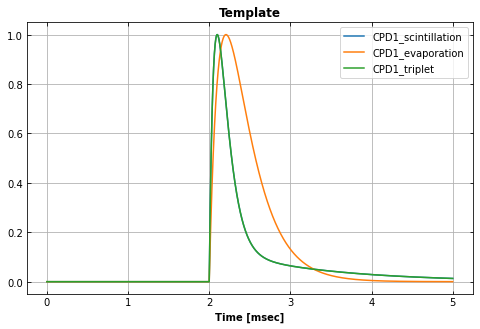

In [3]:
# next goal is to make template, I have average out a lot of signal from CPDs and made these templates 

template_gen = Template(verbose=True)



template_gen.create_template('CPD1_scintillation',A= 0.1293, B= 8.327, 
                         	trace_length_msec=5, #msec
                         	pretrigger_length_msec=2, #msec
                         	sample_rate=1.25e6,
                         	tau_r=82.37e-6, #sec
                         	tau_f1=1.268e-3, #sec
                        	tau_f2=108.81e-6) #sec




template_gen.create_template('CPD1_evaporation',A= 1.350 , B= 0.766,  
                         	trace_length_msec=5, #msec
                         	pretrigger_length_msec=2, #msec
                         	sample_rate=1.25e6,
                         	tau_r=163.2e-6, #sec
                         	tau_f1=177.0e-6, #sec
                        	tau_f2=299.3e-6) #sec


template_gen.create_template('CPD1_triplet',A= 0.1293, B= 8.327, 
                         	trace_length_msec=5, #msec
                         	pretrigger_length_msec=2, #msec
                         	sample_rate=1.25e6,
                         	tau_r=82.37e-6, #sec
                         	tau_f1=1.268e-3, #sec
                        	tau_f2=108.81e-6) #sec


template_gen.plot_template(['CPD1_scintillation','CPD1_evaporation','CPD1_triplet'])

INFO: Creating 3-poles template (tag="default")
INFO: Creating 3-poles template (tag="default")
INFO: Creating 3-poles template (tag="default")


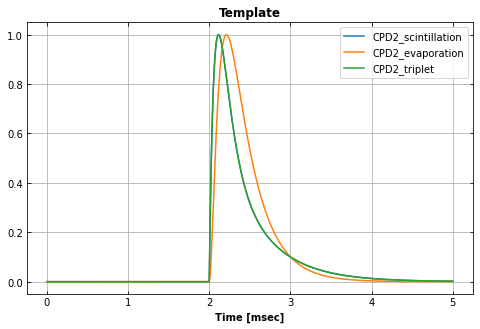

In [4]:
## here I have used same scintillation pulse as in dry case and a three pole pulse for evaporation


template_gen.create_template('CPD2_scintillation',A= 0.553, B= 11.1, 
                         	trace_length_msec=5, #msec
                         	pretrigger_length_msec=2, #msec
                         	sample_rate=1.25e6,
                         	tau_r=0.0895e-3, #sec
                         	tau_f1=0.489e-3, #sec
                        	tau_f2=0.0998e-3) #sec




template_gen.create_template('CPD2_evaporation',A= 1.350 , B= 0.766,  
                         	trace_length_msec=5, #msec
                         	pretrigger_length_msec=2, #msec
                         	sample_rate=1.25e6,
                         	tau_r=94.2e-6, #sec
                         	tau_f1=291.8e-6, #sec
                        	tau_f2=43.10e-6) #sec


template_gen.create_template('CPD2_triplet',A= 0.553, B= 11.1, 
                         	trace_length_msec=5, #msec
                         	pretrigger_length_msec=2, #msec
                         	sample_rate=1.25e6,
                         	tau_r=0.0895e-3, #sec
                         	tau_f1=0.489e-3, #sec
                        	tau_f2=0.0998e-3) #sec


template_gen.plot_template(['CPD2_scintillation','CPD2_evaporation','CPD2_triplet'])

In [5]:
#lets put the template into a numpy arary for easy of handling
CPD1_scintillation, t = template_gen.get_template('CPD1_scintillation')
CPD1_evaporation, t = template_gen.get_template('CPD1_evaporation')
CPD1_triplet, t = template_gen.get_template('CPD1_triplet')

CPD2_scintillation, t = template_gen.get_template('CPD2_scintillation')
CPD2_evaporation, t = template_gen.get_template('CPD2_evaporation')
CPD2_triplet, t = template_gen.get_template('CPD2_triplet')

In [6]:
#one can either load the noise_csd directly into the nxmx2 or you can actually generate the corelated and uncorelated noise yourself: 
#for that you have to load the noise traces 
traces = np.load("of_nxm_demo_files/Noise_traces.npy")
traces_metadata = np.load("of_nxm_demo_files/Noise_traces_metadata.npy",allow_pickle=True)
Noise = qp.Noise(traces, traces_metadata.item()['sample_rate'], ['CPD1','CPD2'])
Noise.calculate_psd()
Noise.calculate_csd(twosided=True)
freqs=np.fft.fftfreq(len(Noise.csd[-2,-2,:]),d=1/traces_metadata.item()['sample_rate'])
Noise.calculate_uncorr_noise()


(0.1, 10000.0)

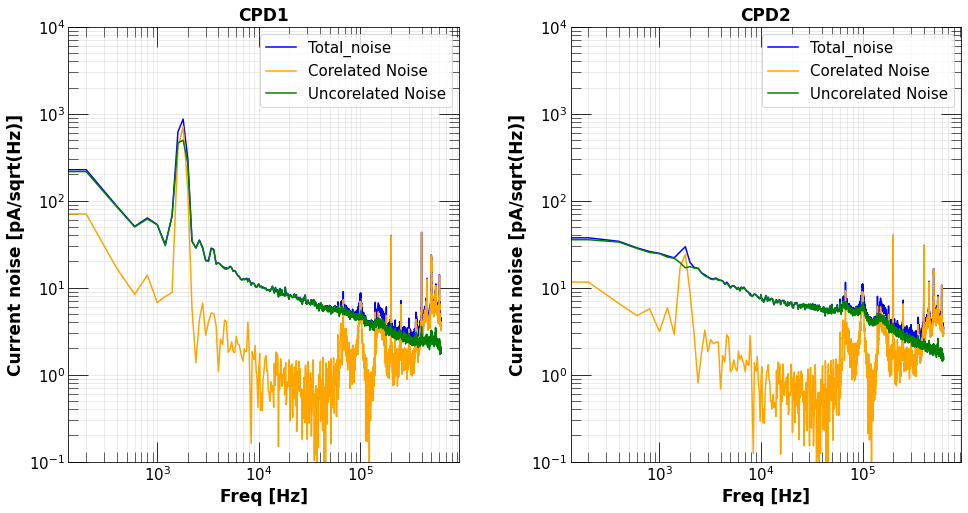

In [7]:
# lets plot it the np.srt(csd)...csd is in A^2/Hz 

f_cutoff= int(len(Noise.csd_freqs)/2)

fig = plt.figure(1,figsize=(16,8))
gs=GridSpec(4,4)
gs.update(wspace=0.8,hspace=0.5)
t=np.arange(-2,3,1/1250)# ms 
##first plot#####
xtr_subplot =fig.add_subplot(gs[0:4,0:2])

plt.plot(Noise.csd_freqs[:f_cutoff], np.sqrt(Noise.csd[0,0,:f_cutoff])*1e12,color = 'blue', label = "Total_noise" )

plt.plot(Noise.csd_freqs[:f_cutoff], np.sqrt(Noise.corrnoise[0][:f_cutoff])*1e12,  color ='orange', label = "Corelated Noise")

plt.plot(Noise.csd_freqs[:f_cutoff], np.sqrt(Noise.uncorrnoise[0][:f_cutoff])*1e12,  color = 'green',label = "Uncorelated Noise")


plt.xscale("log")
plt.yscale("log")

plt.ylabel(r'Current noise [pA/sqrt(Hz)]',fontsize=17,fontweight='bold')
plt.xlabel(r'Freq [Hz]',fontsize=17,fontweight='bold')
plt.title(r'CPD1',fontsize=17,fontweight='bold')
plt.tick_params(direction='in',which='minor',length=10,bottom=True, top =True, left=True, right=True)
plt.tick_params(direction='in',which='major',length=20,bottom=True, top =True, left=True, right=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title("Scintillation",fontsize=17,fontweight='bold')
plt.grid(which ='both', alpha =0.3)

plt.legend(fontsize=15)
plt.ylim(1e-1,1e4)


##second plot#####
xtr_subplot =fig.add_subplot(gs[0:4,2:4])

plt.plot(Noise.csd_freqs[:f_cutoff], np.sqrt(Noise.csd[1,1,:f_cutoff])*1e12,color = 'blue', label = "Total_noise")

plt.plot(Noise.csd_freqs[:f_cutoff], np.sqrt(Noise.corrnoise[1][:f_cutoff])*1e12,  color ='orange', label = "Corelated Noise")
plt.plot(Noise.csd_freqs[:f_cutoff], np.sqrt(Noise.uncorrnoise[1][:f_cutoff])*1e12,  color = 'green',label = "Uncorelated Noise")



plt.xscale("log")
plt.yscale("log")


plt.ylabel(r'Current noise [pA/sqrt(Hz)]',fontsize=17,fontweight='bold')
plt.xlabel(r'Freq [Hz]',fontsize=17,fontweight='bold')
plt.title(r'CPD2',fontsize=17,fontweight='bold')
plt.tick_params(direction='in',which='minor',length=10,bottom=True, top =True, left=True, right=True)
plt.tick_params(direction='in',which='major',length=20,bottom=True, top =True, left=True, right=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title("Scintillation",fontsize=17,fontweight='bold')
plt.grid(which ='both', alpha =0.3)

plt.legend(fontsize=15)

plt.ylim(1e-1,1e4)

#plt.plot(Noise.csd_freqs[:f_cutoff], np.sqrt(Noise.csd[0,0,:f_cutoff])*1e12, label = "PSD CPD1 or J11")



In [9]:
#lets load in some signal traces 
signal_traces = np.load("of_nxm_demo_files/Signal_traces.npy")
signal_traces_metadata = np.load("of_nxm_demo_files/Signal_traces_metadata.npy",allow_pickle=True)

In [11]:
#for some reson the traces file are too big, so I am unable to upload it
noise_csd = np.load("of_nxm_demo_files/Noise_csd.npy")

In [12]:
# you we have everything ready to start calling OF_nxmx2

#First what is the channel list, you have to define it this way : ( 
channel_name_list="CPD1|CPD2"

#First lets define what are the different types of template you want to have: m different types, they can different among the channels
template_tags_2x4 = np.asarray([['scintillation_CPD1','evaporation_CPD1',None, None],
                               [None,None,'scintillation_CPD2','evaporation_CPD2']])


# m different types of templates for each channel: a total of 8 different templates 
template_array_2x4 = np.asarray([[CPD1_scintillation, CPD1_evaporation, 0*CPD2_scintillation, 0*CPD2_evaporation],
                                [0*CPD1_scintillation, 0*CPD1_evaporation, CPD2_scintillation, CPD2_evaporation]])


# out of these m templates which of them you want to move together
tags_which_template_move_together = np.array([0,1,0,1])

#what is the fit window for nxmx2 
fit_window = [[-625,625],[-625,1250]]

#csd = np.copy(Noise.csd)
csd = np.copy(noise_csd)

#a noise trace is needed for the nxm function
noise_traces= traces[0]

#smapling frequency 
fs = traces_metadata.item()['sample_rate']


In [13]:
OF_2x4x2 = qp.OFnxmx2(channels=channel_name_list,
                      templates=template_array_2x4,
                      template_tags=template_tags_2x4,
                      template_time_tags=tags_which_template_move_together,
                      csd=csd, sample_rate=fs,
                      pretrigger_samples=2500,
                      fit_window=fit_window)

INFO: Adding templates with shape=(2, 4, 6250) to OF base object!
INFO: Flag to restrict the time window is ON!! 
INFO: Created time constraints tag "constraints_tag_1725037408656"
INFO: Adding noise CSD to OF base object


In [14]:
i=36
# now we will clcualte q_vector, signal_filt_mat_td etc ..all matrices related to signal
OF_2x4x2.calc(signal=signal_traces[i])

INFO: filtered signal matrix already calculated for channel CPD1|CPD2


In [15]:
#here we will get the fit quantities
fit_results = OF_2x4x2.get_fit()

In [16]:
amps_min= fit_results[0]

time_first_pulse= OF_2x4x2._index_first_pulse
time_second_pulse= OF_2x4x2._index_second_pulse 
chi2_min_per_dOF= OF_2x4x2._of_chi2_per_DOF 

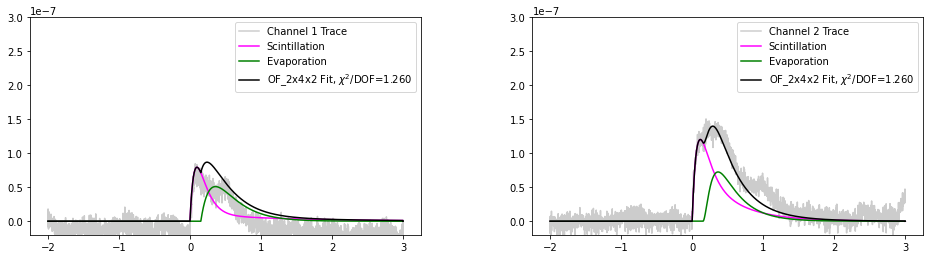

In [17]:
t=np.arange(-2,3,1/(1250))

fig = plt.figure(1,figsize=(16,4))
gs=GridSpec(4,4)
gs.update(wspace=0.8,hspace=0.5)
t=np.arange(-2,3,1/1250)# ms 
##first plot#####
xtr_subplot =fig.add_subplot(gs[0:4,0:2])

template_array_2x4 = np.asarray((CPD1_scintillation, CPD1_evaporation, 0*CPD2_scintillation, 0*CPD2_evaporation,\
                              0*CPD1_scintillation, 0*CPD1_evaporation, CPD2_scintillation, CPD2_evaporation))

template_11 = template_array_2x4[0]
template_21 = template_array_2x4[1]
template_31 = template_array_2x4[2]
template_41 = template_array_2x4[3]

Fit_channel_1 =  shift( amps_min[0]*template_array_2x4[0], time_first_pulse )  + \
                 shift( amps_min[1]*template_array_2x4[1], time_second_pulse)

plt.plot(t,signal_traces[i][0], color='k', alpha=0.2,label= "Channel 1 Trace")

plt.plot(t, shift( amps_min[0]*template_array_2x4[0], time_first_pulse ), color = 'magenta', label='Scintillation' )
plt.plot(t, shift(amps_min[1]*template_array_2x4[1] , time_second_pulse) , \
                                                             color= 'green', label='Evaporation' )

plt.plot(t, Fit_channel_1 , color='k', label=(r'OF_2x4x2 Fit, $\chi^2$/DOF'+ f'={chi2_min_per_dOF:.3f}'))
plt.ylim(-0.2e-7,3e-7)
plt.legend()
##first plot#####
xtr_subplot =fig.add_subplot(gs[0:4,2:4])


template_12 = template_array_2x4[4]
template_22 = template_array_2x4[5]
template_32 = template_array_2x4[6]
template_42 = template_array_2x4[7]

Fit_channel_2 =  shift( amps_min[2]*template_array_2x4[6], time_first_pulse )  + \
                 shift( amps_min[3]*template_array_2x4[7], time_second_pulse )  


plt.plot(t,signal_traces[i][1], color='k', alpha=0.2, label= "Channel 2 Trace")
plt.plot(t, shift( amps_min[2]*template_array_2x4[6], time_first_pulse ), color = 'magenta', label='Scintillation' )
plt.plot(t, shift(amps_min[3]*template_array_2x4[7] , time_second_pulse) , \
                                                             color= 'green', label='Evaporation' )

plt.plot(t,Fit_channel_2, color='k', label=(r'OF_2x4x2 Fit, $\chi^2$/DOF'+ f'={chi2_min_per_dOF:.3f}'))
plt.ylim(-0.2e-7,3e-7)
plt.legend()